In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# 1. Data Loading 

In [3]:
# data source: https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).
# X5: Age (year).
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [4]:
df = pd.read_excel('credit-default-dataset.xls')
df.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

In [5]:
header_name = df.iloc[0, :]
print(list(header_name))

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [6]:
df = df.drop(index=0)

In [7]:
df.head()

Unnamed: 0      X1 X2 X3 X4  X5  X6 X7  X8  X9  ...    X15    X16    X17  \
1          1   20000  2  2  1  24   2  2  -1  -1  ...      0      0      0   
2          2  120000  2  2  2  26  -1  2   0   0  ...   3272   3455   3261   
3          3   90000  2  2  2  34   0  0   0   0  ...  14331  14948  15549   
4          4   50000  2  2  1  37   0  0   0   0  ...  28314  28959  29547   
5          5   50000  1  2  1  57  -1  0  -1   0  ...  20940  19146  19131   

    X18    X19    X20   X21   X22   X23  Y  
1     0    689      0     0     0     0  1  
2     0   1000   1000  1000     0  2000  1  
3  1518   1500   1000  1000  1000  5000  0  
4  2000   2019   1200  1100  1069  1000  0  
5  2000  36681  10000  9000   689   679  0  

[5 rows x 25 columns]

In [8]:
df.shape

(30000, 25)

In [9]:
df = df.rename(columns={'Unnamed: 0':'id'})
df.columns = [x.lower() for x in df.columns]

In [10]:
df.head()

id      x1 x2 x3 x4  x5  x6 x7  x8  x9  ...    x15    x16    x17   x18  \
1  1   20000  2  2  1  24   2  2  -1  -1  ...      0      0      0     0   
2  2  120000  2  2  2  26  -1  2   0   0  ...   3272   3455   3261     0   
3  3   90000  2  2  2  34   0  0   0   0  ...  14331  14948  15549  1518   
4  4   50000  2  2  1  37   0  0   0   0  ...  28314  28959  29547  2000   
5  5   50000  1  2  1  57  -1  0  -1   0  ...  20940  19146  19131  2000   

     x19    x20   x21   x22   x23  y  
1    689      0     0     0     0  1  
2   1000   1000  1000     0  2000  1  
3   1500   1000  1000  1000  5000  0  
4   2019   1200  1100  1069  1000  0  
5  36681  10000  9000   689   679  0  

[5 rows x 25 columns]

In [11]:
# 2. Data Preparation
# Check nan values
# Check outliers
# Check imbalance

In [12]:
df = df.astype('int')
df.describe()

id              x1            x2            x3            x4  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                 x5            x6            x7            x8            x9  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...            x15            x16            x17            x18  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

                x19           x20            x21            x22  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

                 x23             y  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 25 columns]

In [13]:
df.isna().sum()

id     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
y      0
dtype: int64

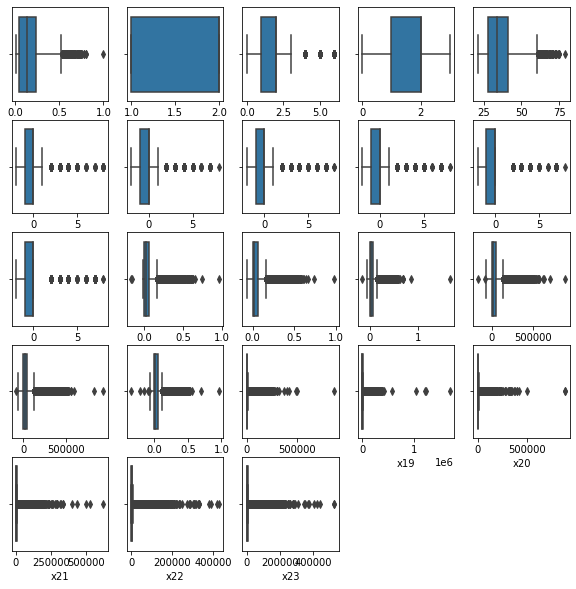

In [14]:
plt.figure(figsize=(10,10))
for i in range(23):
    ax = plt.subplot(5,5, i+1)
    sns.boxplot(df.iloc[:,i+1])
plt.show()

In [15]:
# remove outliers from dataframe

def remove_outliers(df):
    data = df.iloc[:, 1:-1]
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75-q25

    mask = (data < (q25 - 1.5*iqr)) | (data > (q75 + 1.5*iqr)) # set the cap
    df[mask] = np.nan # set the cap from the dataframe
    df = df.dropna()
    return df

In [16]:
# apply function to remove outliers from the dataframe
df = remove_outliers(df)

In [17]:
df.shape

(12933, 25)

In [18]:
# remove unnecessary values from the dataframe
df = df.loc[(df['x3'] != 0) & (df['x4'] != 0)]

In [19]:
df.shape

(12901, 25)

In [20]:
# re-engineer the categorical variables (value starting from 0)
df.x2 = df.x2.replace(2, 0)
df.x3 = df.x3.replace(3, 0)
df.x4 = df.x4.replace(3, 0)

In [21]:
df = df.reset_index(drop=True)

In [22]:
df.head()

id        x1  x2   x3  x4    x5   x6   x7   x8   x9  ...      x15      x16  \
0   3   90000.0   0  2.0   2  34.0  0.0  0.0  0.0  0.0  ...  14331.0  14948.0   
1   4   50000.0   0  2.0   1  37.0  0.0  0.0  0.0  0.0  ...  28314.0  28959.0   
2   6   50000.0   1  1.0   2  37.0  0.0  0.0  0.0  0.0  ...  19394.0  19619.0   
3   8  100000.0   0  2.0   2  23.0  0.0 -1.0 -1.0  0.0  ...    221.0   -159.0   
4  15  250000.0   1  1.0   2  29.0  0.0  0.0  0.0  0.0  ...  59696.0  56875.0   

       x17     x18     x19     x20     x21     x22     x23  y  
0  15549.0  1518.0  1500.0  1000.0  1000.0  1000.0  5000.0  0  
1  29547.0  2000.0  2019.0  1200.0  1100.0  1069.0  1000.0  0  
2  20024.0  2500.0  1815.0   657.0  1000.0  1000.0   800.0  0  
3    567.0   380.0   601.0     0.0   581.0  1687.0  1542.0  0  
4  55512.0  3000.0  3000.0  3000.0  3000.0  3000.0  3000.0  0  

[5 rows x 25 columns]

In [23]:
# 3. Feature Engineering & Scaling

In [24]:
from keras.utils import np_utils

def one_hot_encoding(df):
    # one-hot encode 
    x2 = pd.DataFrame(np_utils.to_categorical(df.iloc[:, 2]), columns=['x2_0', 'x2_1'])
    x3 = pd.DataFrame(np_utils.to_categorical(df.iloc[:, 3]), columns=['x3_0', 'x3_1', 'x3_2'])
    x4 = pd.DataFrame(np_utils.to_categorical(df.iloc[:, 4]), columns=['x4_0', 'x4_1', 'x4_2'])
    # separate the target variable
    y = df['y']
    # drop the original columns
    df = df.drop(columns=['x2', 'x3', 'x4', 'y'])
    # concatenate all the encoded variables into the df
    df = pd.concat([df, x2, x3, x4, y], axis=1)
    return df

In [25]:
df = one_hot_encoding(df)

In [29]:
df.head()

id        x1    x5   x6   x7   x8   x9  x10  x11      x12  ...     x23  \
0   3   90000.0  34.0  0.0  0.0  0.0  0.0  0.0  0.0  29239.0  ...  5000.0   
1   4   50000.0  37.0  0.0  0.0  0.0  0.0  0.0  0.0  46990.0  ...  1000.0   
2   6   50000.0  37.0  0.0  0.0  0.0  0.0  0.0  0.0  64400.0  ...   800.0   
3   8  100000.0  23.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  11876.0  ...  1542.0   
4  15  250000.0  29.0  0.0  0.0  0.0  0.0  0.0  0.0  70887.0  ...  3000.0   

   x2_0  x2_1  x3_0  x3_1  x3_2  x4_0  x4_1  x4_2  y  
0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  0  
1   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0  0  
2   0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0  0  
3   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  0  
4   0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0  0  

[5 rows x 30 columns]

In [31]:
from sklearn.preprocessing import MinMaxScaler

def data_scaling(df):
    # separate the id & target variable
    id = df['id']
    y = df['y']
    # drop the id & target variables
    df = df.drop(columns=['id', 'y'])
    # scale the dataset
    mm = MinMaxScaler()
    df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
    # concatenate the idf & target variable into the dataframe
    df = pd.concat([id, df, y], axis=1)
    return df

In [34]:
df = data_scaling(df)

In [36]:
df.head()

id        x1        x5        x6        x7   x8   x9  x10  x11       x12  \
0   3  0.156863  0.333333  0.666667  0.666667  1.0  1.0  1.0  1.0  0.234679   
1   4  0.078431  0.410256  0.666667  0.666667  1.0  1.0  1.0  1.0  0.336822   
2   6  0.078431  0.410256  0.666667  0.666667  1.0  1.0  1.0  1.0  0.437003   
3   8  0.176471  0.051282  0.666667  0.333333  0.5  1.0  1.0  0.5  0.134769   
4  15  0.470588  0.205128  0.666667  0.666667  1.0  1.0  1.0  1.0  0.474330   

   ...       x23  x2_0  x2_1  x3_0  x3_1  x3_2  x4_0  x4_1  x4_2  y  
0  ...  0.509321   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  0  
1  ...  0.101864   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0  0  
2  ...  0.081491   0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0  0  
3  ...  0.157074   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  0  
4  ...  0.305592   0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0  0  

[5 rows x 30 columns]

In [37]:
# 4. Feature Selection

In [38]:
from sklearn.decomposition import PCA

def feature_selection(df):
    # separate the id & target variable
    id = df['id']
    y = df['y']
    # drop the id & target variables
    df = df.drop(columns=['id', 'y'])
    # scale the dataset
    pca = PCA(.95)
    df = pd.DataFrame(pca.fit_transform(df))
    # concatenate the idf & target variable into the dataframe
    df = pd.concat([id, df, y], axis=1)
    return df

In [41]:
df = feature_selection(df)

In [42]:
df.head()

id         0         1         2         3         4         5         6  \
0   3 -0.743546  0.219143 -0.697434 -0.660349  0.046250 -0.322798  0.129173   
1   4 -0.762161 -1.017057 -0.344452 -0.134172 -0.206068 -0.276836 -0.110530   
2   6 -0.605764  1.129958  0.625537  0.496231 -0.196523 -0.267921 -0.159566   
3   8 -0.130290  0.245447 -0.685735 -0.840386  0.088229 -0.399971  0.077517   
4  15 -0.784919  1.152572  0.570998  0.607029 -0.377920  0.247257 -0.033178   

          7         8         9        10        11  y  
0  0.079673  0.077694  0.113485  0.077701 -0.155154  0  
1 -0.036946 -0.154224 -0.045103  0.038332  0.006723  0  
2 -0.069183 -0.208134  0.099154  0.125847  0.001513  0  
3  0.144554  0.029838 -0.104991 -0.132485  0.276783  0  
4  0.074811 -0.009869  0.014272 -0.161892 -0.078935  0

In [ ]:
# 5. Dealing with imbalanced data and Splitting

In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

features, target = oversample.fit_resample(df.iloc[:, 1:-1], df.iloc[:, -1])
print(Counter(target))

Counter({0: 10963, 1: 10963})


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=True)

In [51]:
# 6. Classification Modelling (Traditional ML Algorithms)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
# define the classifier

classifier = {
    'Logistic Regression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [55]:
train_scores = []
test_scores = []

for key, classifier in classifier.items():
    classifier.fit(x_train, y_train)
    train_score = round(classifier.score(x_train, y_train), 2)
    test_score = round(classifier.score(x_test, y_test), 2)
    train_scores.append(train_score)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.61, 0.84, 0.66, 1.0, 1.0]
[0.61, 0.76, 0.64, 0.75, 0.85]


In [69]:
# cross validate

from sklearn.model_selection import cross_val_score

train_cv_scores = []
test_cv_scores = []

for key, classifier in classifier.items():
    classifier.fit(x_train, y_train)
    train_cv_score = cross_val_score(classifier, x_train, y_train, cv=5)
    test_cv_score = cross_val_score(classifier, x_test, y_test, cv=5)
    train_cv_scores.append(round(train_cv_score.mean(),2))
    test_cv_scores.append(round(test_cv_score.mean(),2))

print(train_cv_scores)
print(test_cv_scores)

[0.61, 0.74, 0.65, 0.72, 0.82]
[0.61, 0.67, 0.63, 0.66, 0.74]
